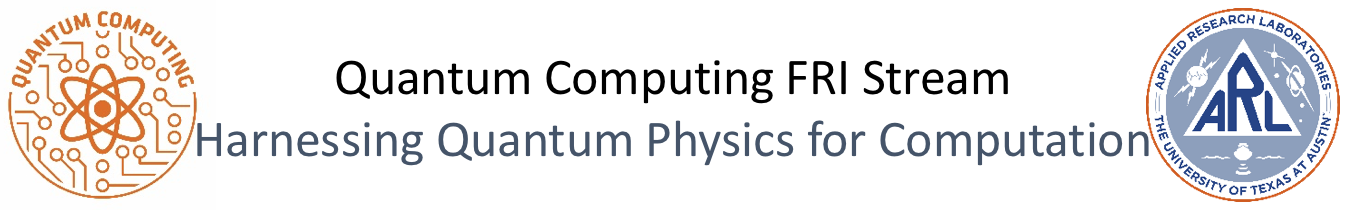

#### Most Recent Lesson: Lesson07 - Bernstein-Vazirani and Simon's Problems

### Installations and Imports

In [1]:
%pip install qiskit
%pip install qiskit-aer

#You may need to restart the runtime for this change to take effect
%pip install pylatexenc
%pip install qiskit_ibm_runtime

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer
from qiskit.primitives import Sampler, StatevectorSampler, Estimator, StatevectorEstimator
import numpy as np

sampler = StatevectorSampler()
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import SamplerV2 as Sampler

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# <font color=green>Assignment</font>

Both exercises below ask you to implement Simon's algorithm.

Recall Simon's Problem from our last lesson:

$\text{Let }a\text{ be an unknown, positive, }n\text{-bit integer that characterizes the function }f\text{ such that for }x' \neq x,$

$$f(x') = f(x) \iff x' = x\oplus a$$


And Simon's algorithm for solving the problem:

$1)\text{ Start with two }n\text{-qubit registers in the all zero state }|0\dots 0\rangle|0\dots 0\rangle.$

$2)\text{ Apply Hadamard gates to the input (left) register.}$

$3)\text{ Apply the unitary }\mathbf{U}_{f}\text{ that implements }f.$

$4)\text{ Apply another set of Hadamard gates to the input register.}$

$5)\text{ Measure the input register.}$

$6)\text{ Use the (not obvious) fact that }a\odot x=0\text{ for each measured outcome }x\text{ to find }a.$


### <font color=green>Exercise</font>

$\text{Use Qiskit to implement Simon's algorithm for the following function which corresponds to the given unitary.}$

<table>
<tr>
 <td>
 <font size=4>$x$
 </td>
 <td>
 <font size=4>$f(x)$
 </td>
</tr>
<tr>
 <td>
 <font size=4>$00$
 </td>
 <td>
 <font size=4>$00$
 </td></td><td>
</tr>
<tr>
 <td>
 <font size=4>$01$
 </td>
 <td>
 <font size=4>$01$
 </td>
</tr>
<tr>
 <td>
 <font size=4>$10$
 </td>
 <td>
 <font size=4>$00$
 </td></td><td>
</tr>
<tr>
 <td>
 <font size=4>$11$
 </td>
 <td>
 <font size=4>$01$
 </td>
</tr>

</table>

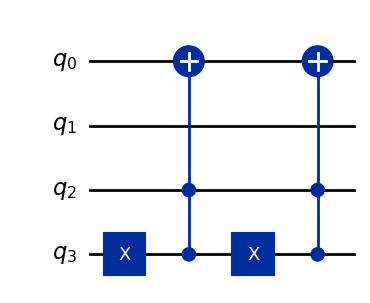

In [2]:
U=QuantumCircuit(4, name='U')
U.x(3)
U.ccx(3,2,0)
U.x(3)
U.ccx(3,2,0)
U.draw('mpl')

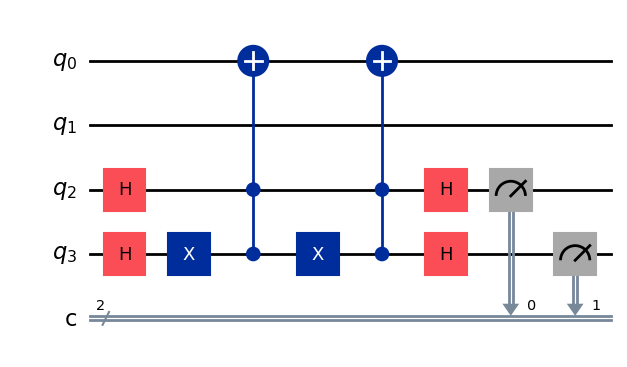

In [3]:
qc = QuantumCircuit(4, 2)

# Step 2
qc.h(2)
qc.h(3)

# Step 3 Unitary
qc.x(3)
qc.ccx(3,2,0)
qc.x(3)
qc.ccx(3,2,0)

# Step 4
qc.h(2)
qc.h(3)

# Step 5
qc.measure(2, 0)
qc.measure(3, 1)

qc.draw('mpl')

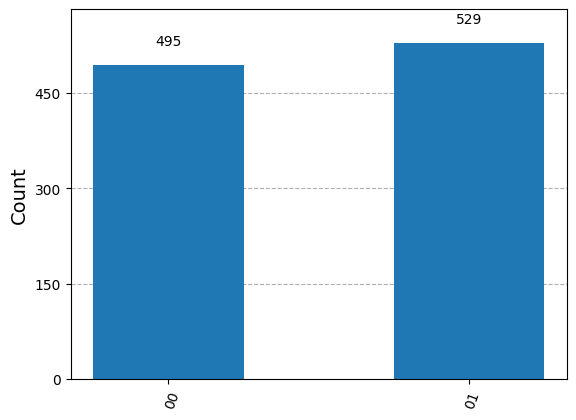

In [5]:
backend = Aer.get_backend('qasm_simulator') #tell it where to simulate

job = transpile(qc, backend)
results = sampler.run([qc]).result()
data_pub = results[0].data
counts = data_pub.c.get_counts()

#counts=execute(qc, backend, shots=1024).result().get_counts(qc)

plot_histogram(counts)

Answers: a = 10
possibilites, 00 (must be postive though)
01 (doesnt agree with not obvious face), 10, 11 (doesnt agree with not obvious face)

### <font color=green>Exercise</font>

$\text{Use Qiskit to implement Simon's algorithm for the following function implemented with the given unitary.}$

<table>
<tr>
 <td>
 <font size=4>$x$
 </td>
 <td>
 <font size=4>$f(x)$
 </td>
</tr>
<tr>
 <td>
 <font size=4>$000$
 </td>
 <td>
 <font size=4>$100$
 </td>
</tr>
<tr>
 <td>
 <font size=4>$001$
 </td>
 <td>
 <font size=4>$010$
 </td>
</tr>
<tr>
 <td>
 <font size=4>$010$
 </td>
 <td>
 <font size=4>$000$
 </td>
</tr>
<tr>
 <td>
 <font size=4>$011$
 </td>
 <td>
 <font size=4>$110$
 </td>
</tr>
<tr>
 <td>
 <font size=4>$100$
 </td>
 <td>
 <font size=4>$000$
 </td>
</tr>
<tr>
 <td>
 <font size=4>$101$
 </td>
 <td>
 <font size=4>$110$
 </td>
</tr>
<tr>
 <td>
 <font size=4>$110$
 </td>
 <td>
 <font size=4>$100$
 </td>
</tr>
<tr>
 <td>
 <font size=4>$111$
 </td>
 <td>
 <font size=4>$010$
 </td>
</tr>
</table>

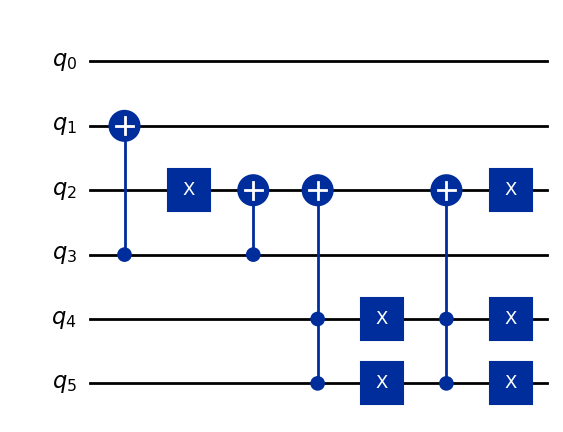

In [6]:
U2=QuantumCircuit(6)
U2.cx(3,1)
U2.x(2)
U2.cx(3,2)
U2.ccx(5,4,2)
U2.x(4)
U2.x(5)
U2.ccx(5,4,2)
U2.x(2)
U2.x(4)
U2.x(5)
U2.draw('mpl')

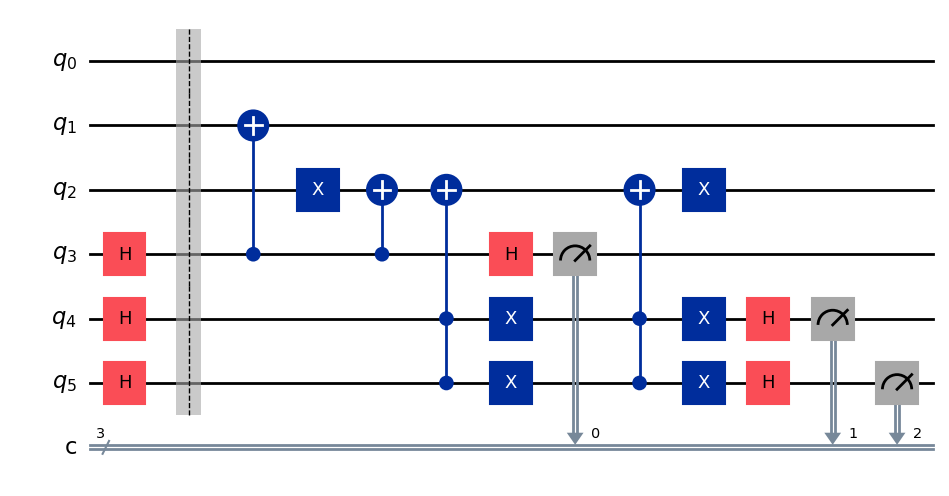

In [7]:
qc = QuantumCircuit(6, 3)

# Step 2
for i in range(3, 6):
  qc.h(i)
qc.barrier()
# Step 3
qc.compose(U2, inplace='True')

# Step 4
for i in range(3, 6):
  qc.h(i)

# Step 5
for i in range(3, 6):
  qc.measure(i, i-3)

qc.draw('mpl')

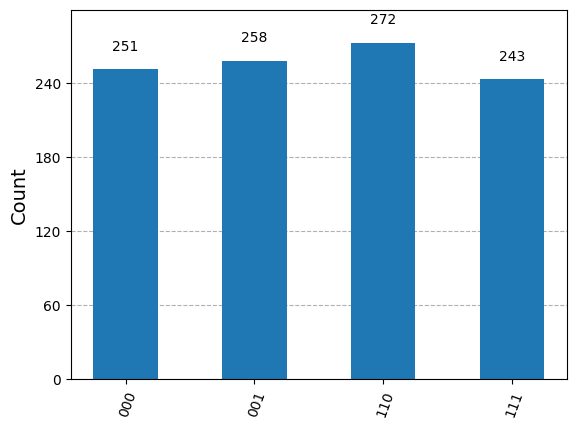

In [8]:
backend = Aer.get_backend('qasm_simulator') #tell it where to simulate

job = transpile(qc, backend)
results = sampler.run([qc]).result()
data_pub = results[0].data
counts = data_pub.c.get_counts()

#counts=execute(qc, backend, shots=1024).result().get_counts(qc)

plot_histogram(counts)

a = 110
because the x=001 tells us that a0 = 0
x=110 tells us that a2+a1 = 0, which means they are either both 1 or both 0
obviously cant be both 0 since a must be positive, which gives
110